In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
def readDBabse(nclass,fname,n5):
    with nc.Dataset(fname) as fh:
        zkum=fh.variables["zkum%2.2i"%(nclass)][:,:-n5]
        zkam=fh.variables["zkam%2.2i"%(nclass)][:,:-n5]
        pRate=fh.variables["pRate%2.2i"%(nclass)][:,:-n5]
        pRate=fh.variables["pRate%2.2i"%(nclass)][:,:-n5]
        n52=int(n5/2)
        pRateCMB=fh.variables["pRateCMB%2.2i"%(nclass)][:,:-n52]
    zkum[zkum<0]=0
    FL=168+2*nclass
    return zkum,zkam,pRate,pRateCMB,FL

fnameL="convectiveProfilesOcean.nc"

ncl=-5

zkumO,zkamO,pRateO,pRateCMBO,FL_O=readDBabse(ncl,fnameL,6)

#plt.plot(zkumO.mean(axis=0))

-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


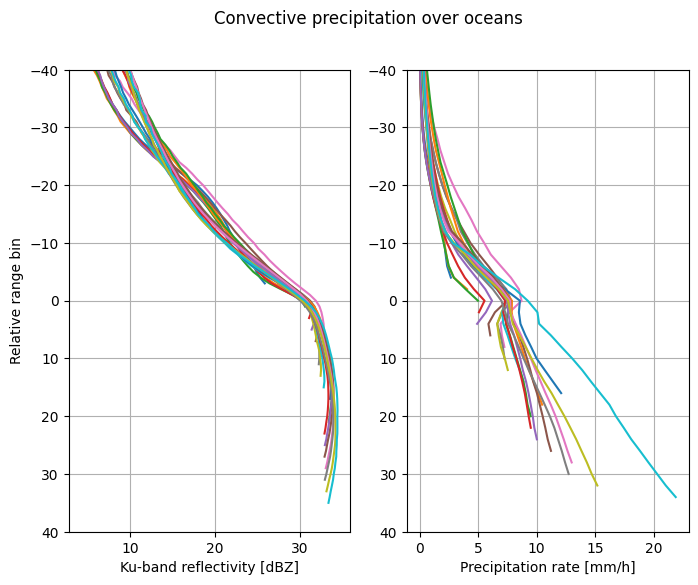

In [3]:
plt.figure(figsize=(8,6))
ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)
for ncl in range(-5,15,1):
    print(ncl)
    zkumO,zkamO,pRateO,pRateCMBO,FL_O=readDBabse(ncl,fnameL,6)
    zkumO=zkumO[:,:78]
    pRateO=pRateO[:,:78]   
    pRateCMBO=pRateCMBO[:,:39] 
    h=np.arange(zkumO.shape[1])+2*ncl-70
    zmL=[]
    hL=[]
    pRateL=[]
    pRateLL=[]
    indL=[]
    clutL=[]
    ax1.plot(zkumO.mean(axis=0),h)
    ax1.set_ylim(40,-40)
    ax2.plot(pRateCMBO.mean(axis=0),h[::2])
    ax2.set_ylim(40,-40)
ax1.set_xlabel("Ku-band reflectivity [dBZ]")
ax1.set_ylabel("Relative range bin")
ax2.set_xlabel("Precipitation rate [mm/h]")
#ax2.set_ylabel("Relative range bin")
ax2.grid()
ax1.grid()
plt.suptitle("Convective precipitation over oceans")
plt.savefig("convectiveProfilesOcean.png",dpi=300,bbox_inches="tight")

In [2]:
zkumO[0,77]
import matplotlib.pyplot as plt
h=np.arange(zkumO.shape[1])+2*ncl-70
print(pRateCMBO.shape)
print(h[::2].shape)
pRateCMBOResampled=np.interp(h[0:78],h[0::2][:-1],pRateCMBO.mean(axis=0)[:-1])



(81057, 40)
(40,)


In [29]:
xL=[]
yL=[]
corrCoefL=[]
relBiasL=[]
biasL=[]
clut_unrolled_L=[]
pRateL_all=[]
pRateLL_all=[]
classL=[]
npoints=25
#corrFact=np.loadtxt("corrFact.txt")
corrFact=np.loadtxt("corrFact_OceanConv.txt")
from scipy.ndimage.filters import gaussian_filter
#corrFact=gaussian_filter(corrFact,sigma=1)
np.random.seed(1969)
for ncl in range(-5,16):
    print(ncl)
    zkumO,zkamO,pRateO,pRateCMBO,FL_O=readDBabse(ncl,fnameL,6)
    zkumO=zkumO[:,:78]
    pRateO=pRateO[:,:78]   
    pRateCMBO=pRateCMBO[:,:39] 
    h=np.arange(zkumO.shape[1])+2*ncl-70
    zmL=[]
    hL=[]
    pRateL=[]
    pRateLL=[]
    indL=[]
    clutL=[]
    for it in range(12):
        for i,zkum in enumerate(zkumO):
            k=np.random.randint(0,25)
            nlev_end=k+1
            nlev_start=nlev_end+npoints
            hL.append(h[-nlev_start:-nlev_end])
            zmL.append(zkum[-nlev_start:-nlev_end])
            pRateCMBO_Resampled=np.interp(h[0:78],h[0::2][:-1],pRateCMBO[i,:][:-1])
            pRateLL.append(pRateCMBO_Resampled[-nlev_end-1])
            pRateL.append(pRateCMBO_Resampled[-1])
            x1=[]
            x1.extend(zmL[-1])
            x1.extend(hL[-1][-1:])
            x1.append(h[-1])
            x1.append(pRateLL[-1])
            x1.append(pRateLL[-1]*corrFact[min(ncl+5,21),k])
            yL.append(pRateL[-1])
            indL.append(h[-1])
            clutL.append(k)
            xL.append(x1)
            classL.append(ncl)
    pRateLL=np.array(pRateLL)
    pRateL=np.array(pRateL)
    pRateL_all.extend(pRateL)
    pRateLL_all.extend(pRateLL)
    clutL=np.array(clutL)
    corrCoef=[]
    relBias=[]
    bias=[]
    clut_unrolled_L.append(clutL)
    for i in range(25):
        a=np.where(clutL==i)
        corrCoef.append(np.corrcoef(pRateLL[a],pRateL[a])[0,1])
        relBias.append((pRateLL[a].mean()-pRateL[a].mean())/pRateL[a].mean())
        bias.append((pRateLL[a].mean()-pRateL[a].mean()))
    corrCoefL.append(corrCoef)
    relBiasL.append(relBias)
    biasL.append(bias)

/var/folders/x_/d2_jzyq50052xh1_tk02bnmc0000gq/T/ipykernel_58629/1585982088.py:13: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


1889676
18.62668074470646 15.030461890447253
(21, 25)


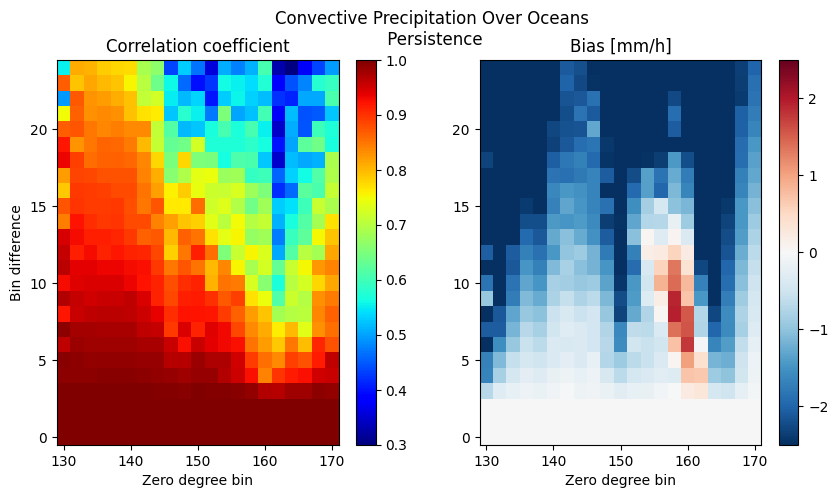

In [30]:
#plt.subplot(121)
#plt.plot(corrCoef)
#plt.subplot(122)
#plt.plot(relBias)
print(len(xL))
print(np.mean(pRateL),np.mean(pRateLL))
corrCoefL=np.array(corrCoefL)
relBiasL=np.array(relBiasL)
biasL=np.array(biasL)
print(corrCoefL.shape)
plt.figure(figsize=(10,5))
x=160-np.arange(-5,16)*2
y=np.arange(25)
plt.suptitle("Convective Precipitation Over Oceans\n Persistence")
plt.subplot(121)
plt.pcolormesh(x,y,corrCoefL.T,cmap="jet",vmin=0.3,vmax=1)
plt.xlim(129,171)
plt.xlabel("Zero degree bin")
plt.ylabel("Bin difference")
plt.title("Correlation coefficient")
plt.colorbar()
plt.subplot(122)
plt.pcolormesh(x,y,biasL.T,cmap="RdBu_r",vmin=-2.5,vmax=2.5)
plt.xlabel("Zero degree bin")
plt.xlim(129,171)
#plt.ylabel("Bin difference")
plt.title("Bias [mm/h]")
plt.colorbar()
plt.savefig("CorrCoefBiasOcean_Conv_2.png",dpi=300,bbox_inches="tight")
corrFactor=1/(1+relBiasL)
np.savetxt("corrFact_OceanConv.txt",corrFactor)

In [31]:
xL=np.array(xL)
#print(xL.shape[1]-npoints-4)
#stop
# split the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, ind_train, ind_test = train_test_split(xL[:,:], range(len(xL)), test_size=0.25, random_state=42)
# fit the model
y_train=[pRateL_all[i] for i in ind_train]
y_test=[pRateL_all[i] for i in ind_test]

In [32]:
print(np.corrcoef(pRateLL_all,pRateL_all))
print(np.mean(pRateLL_all),np.mean(pRateL_all))
X_test=np.array(X_test)
X_train=np.array(X_train)
#print(X_test.mean(axis=0))
#print(X_train.shape)

[[1.         0.89672003]
 [0.89672003 1.        ]]
8.36591592817935 10.139937828082005


In [33]:
#clut_unrolled_L=np.array(clut_unrolled_L)
clut_unrolled_L2=[]
for i in range(len(clut_unrolled_L)):
    clut_unrolled_L2.extend(clut_unrolled_L[i])
clut_unrolled_L2=np.array(clut_unrolled_L2)
print(clut_unrolled_L2.shape)
classL=np.array(classL)
print(classL.shape)


(1889676,)
(1889676,)


In [34]:
classL_test=classL[ind_test]
clut_unrolled_L2_test=clut_unrolled_L2[ind_test]


In [47]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10,weights="distance")
y_train=np.array(y_train)
print(X_train.mean(axis=0))
print(y_train.mean(axis=0))
neigh.fit(X_train, y_train)
print(X_test.shape)
y_pred=neigh.predict(X_test)

[19.74328448 20.31876719 20.89740298 21.47540062 22.0525874  22.62607771
 23.19504204 23.75281018 24.30351337 24.84094    25.36319284 25.86465222
 26.34805805 26.81323349 27.25406463 27.67358698 28.07072884 28.44158064
 28.78670941 29.10855111 29.40965493 29.68987466 29.95533607 30.20019422
 30.43013218  8.58291263 21.57587721  8.3593808  10.13159006]
10.133307820316547
(472419, 29)


AttributeError: 'NoneType' object has no attribute 'split'

In [35]:
y_pers=np.array([pRateLL_all[i] for i in ind_test])
print((y_test[:]-y_pers).std())
y_test=np.array(y_test)[:]
#y_pred=np.array(y_pred_faiss)[:,np.newaxis]
corrCoeff_test=np.zeros((21,25),np.float32)
relBias_test=np.zeros((21,25),np.float32)
bias_test=np.zeros((21,25),np.float32)
X_test=np.array(X_test)
for i in range(21):
    for j in range(25):
        ind=np.nonzero((classL_test==i-5)&(clut_unrolled_L2_test==j))
        corrCoeff_test[i,j]=np.corrcoef(y_test[ind], X_test[ind,-1])[0,1]
        relBias_test[i,j]=(X_test[ind,-1].mean()-y_test[ind].mean())/y_test[ind].mean()
        bias_test[i,j]=(X_test[ind[0],-1].mean()-y_test[ind].mean())
        print(len(ind[0]))
        #stop

6.882305546313998
1034
1023
977
1044
996
1082
972
981
1033
1067
1013
1012
1040
1004
1087
1004
1037
1036
1076
1110
1075
1001
1061
1070
1033
817
685
802
748
765
732
761
725
792
792
799
767
707
765
776
768
726
767
760
779
782
746
781
810
833
937
920
977
914
975
911
934
1028
978
917
899
954
968
1005
908
919
976
949
991
916
927
961
872
937
940
752
786
789
739
738
766
733
774
800
738
761
756
741
797
818
771
797
803
747
737
751
762
781
798
743
474
465
464
471
451
489
478
432
460
446
474
458
493
463
468
447
477
447
515
437
482
469
429
520
438
321
289
279
329
328
253
304
293
274
263
290
277
287
300
302
296
282
311
287
309
287
281
289
270
280
241
259
276
257
255
277
280
250
247
296
272
260
236
234
249
296
267
256
266
278
263
246
244
250
234
230
217
230
229
220
242
257
212
225
248
202
198
218
229
221
192
210
233
233
229
203
213
232
211
207
221
187
250
212
224
195
224
215
208
227
226
226
218
242
249
229
211
221
249
206
229
231
213
232
228
253
233
303
297
283
256
269
270
266
291
269
291
286
266
269

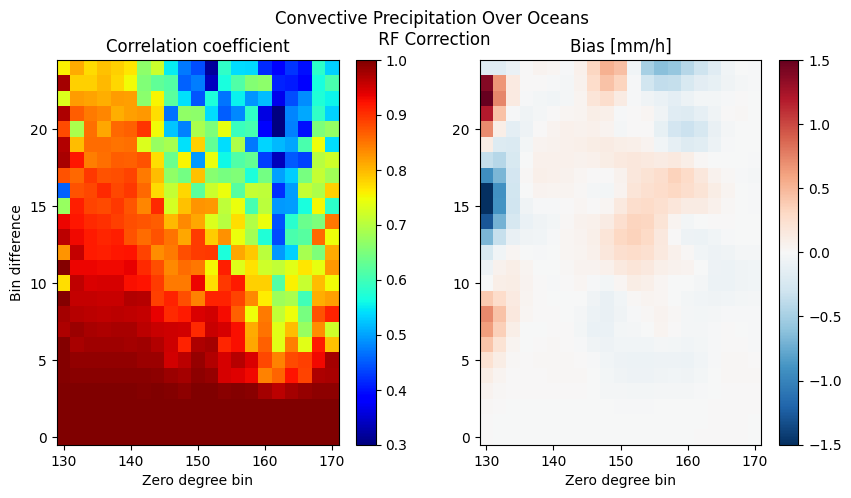

In [42]:
plt.figure(figsize=(10,5))
x=160-np.arange(-5,16)*2
y=np.arange(25)
plt.suptitle("Convective Precipitation Over Oceans\n RF Correction")
plt.subplot(121)
plt.pcolormesh(x,y,corrCoeff_test.T,cmap="jet",vmin=0.3,vmax=1)
plt.xlabel("Zero degree bin")
plt.ylabel("Bin difference")
plt.title("Correlation coefficient")
plt.colorbar()
plt.subplot(122)
bias_test=gaussian_filter(bias_test,sigma=0.25)
plt.pcolormesh(x,y,bias_test.T,cmap="RdBu_r",vmin=-1.5,vmax=1.5)
plt.xlabel("Zero degree bin")
#plt.ylabel("Bin difference")
plt.title("Bias [mm/h]")
plt.colorbar()
plt.savefig("CorrCoefBiasOcean_ML_pruned_Conv_2.png",dpi=300,bbox_inches="tight")

In [114]:
print((y_test-y_pred).mean()/y_test.mean())
y_test=np.array(y_test)[:]
print(((y_test[:]-y_pred)**2).mean()**0.5/y_test[:].mean())
print(((y_test[:]-1.18*y_pers)**2).mean()**0.5/y_test[:].mean())
print(y_test[:].mean()/y_pers.mean())

-0.0002647824614788163
0.5833433740279071
0.6811856082067902
1.1823482819140059


7.107340808005965
8.004175222600447
1.211591681006641


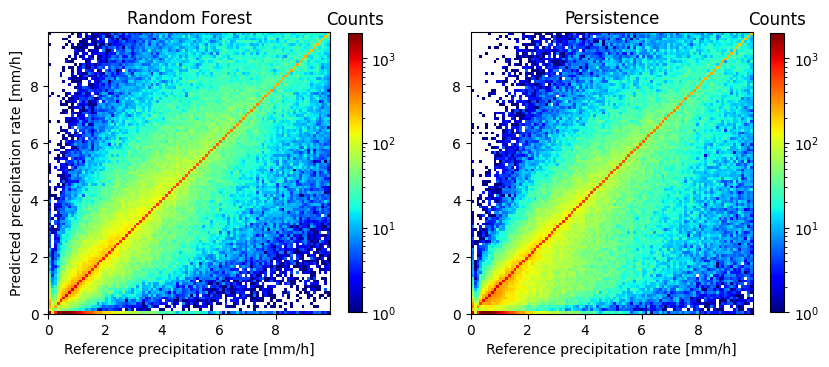

In [41]:
from matplotlib.colors import LogNorm
y_test=np.array(y_test)
plt.figure(figsize=(10,5))
orient="vertical"
ax1=plt.subplot(121)
y_pred=X_test[:,-1]
hist1=plt.hist2d(y_test[:], y_pred[:], bins=(0.1*np.arange(100), 0.1*np.arange(100)), cmap=plt.cm.jet,norm=LogNorm())
plt.xlabel("Reference precipitation rate [mm/h]")
plt.ylabel("Predicted precipitation rate [mm/h]")
plt.title("Random Forest")
cbar1=plt.colorbar(hist1[-1],orientation=orient,shrink=0.725)
cbar1.ax.set_title("Counts")
ax1.set_aspect(1)
ax1=plt.subplot(122)
hist1=plt.hist2d(y_test[:], y_pers[:], bins=(0.1*np.arange(100), 0.1*np.arange(100)), cmap=plt.cm.jet,norm=LogNorm())
plt.xlabel("Reference precipitation rate [mm/h]")
plt.title("Persistence")
cbar2=plt.colorbar(hist1[-1],orientation=orient,shrink=0.725)
cbar2.ax.set_title("Counts")
ax1.set_aspect(1)

print(np.mean((y_test[:]-y_pers[:])**2)**0.5)
print((y_test[:]-1.39*y_pers[:]).std())
print(y_test.mean()/y_pers.mean())
plt.savefig("scatterPlotsOcean.png",dpi=300,bbox_inches="tight")